In [1]:
import numpy as np
import pandas as pd

from matplotlib import pyplot as plt

In [2]:
# Simulated Flares
class_info = pd.read_csv('allflares_processed.csv')
ids = [i for i in class_info['identifier']]

peaka = []
peakb = []

    
for index in range(len(class_info)):
    if str(class_info['flare_type'][index]) == 'A':
        peaka.append(class_info['peak_count'][index])
    if str(class_info['flare_type'][index]) == 'B':
        peakb.append(class_info['peak_count'][index])
    

print(len(peaka))
print(len(peakb))

127
964


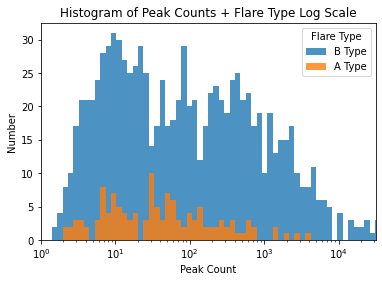

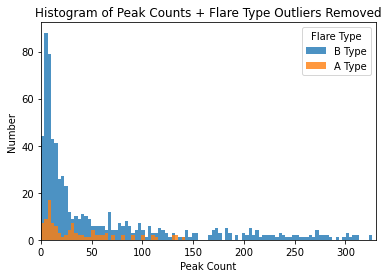

In [3]:
# Discard outliers to make histogram more readable
def remove_outlier(data):
    data = np.array(data)
    median = np.median(data)
    threshold = 4 * np.median(np.abs(data - median))
    data = data[(data >= median - threshold) & (data <= median + threshold)]
    return data

# Log Scale
plt.figure()
bins = np.logspace(0, 5, 70)
plt.hist(peakb, label="B Type", bins=bins, alpha=0.8)
plt.hist(peaka, label="A Type", bins=bins, alpha=0.8)
plt.legend(title="Flare Type")
plt.xlabel("Peak Count")
plt.ylabel("Number")
plt.xlim([1,10**4.5])
plt.xscale('log')
plt.title("Histogram of Peak Counts + Flare Type Log Scale")
plt.show()

# Outliers Removed
peakaa = remove_outlier(peaka)
peakbb = remove_outlier(peakb)

peaktot = np.concatenate((peakaa, peakbb))
plt.figure()
bins = np.arange(0, np.max(peaktot), np.max(peaktot) / 100)
plt.hist(peakbb, label="B Type", bins=bins, alpha=0.8)
plt.hist(peakaa, label="A Type", bins=bins, alpha=0.8)
plt.legend(title="Flare Type")
plt.xlabel("Peak Count")
plt.ylabel("Number")
plt.xlim(0, np.max(peaktot))
plt.title("Histogram of Peak Counts + Flare Type Outliers Removed")
plt.show()

In [4]:
aoffset = []
boffset = []

for index in range(len(class_info)):
    tod = pd.read_csv('flares/' + f"{class_info['identifier'][index]}" + '.csv')
    window = ((np.max(tod['Time']) - np.min(tod['Time'])) / 2)
    peaktime = class_info['peak_time'][index] - np.min(tod['Time'])
    peakoffset = np.abs(window - peaktime)
    if str(class_info['flare_type'][index]) == 'A':
        aoffset.append(peakoffset)
    if str(class_info['flare_type'][index]) == 'B':
        boffset.append(peakoffset)

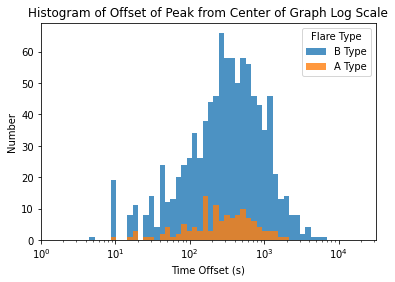

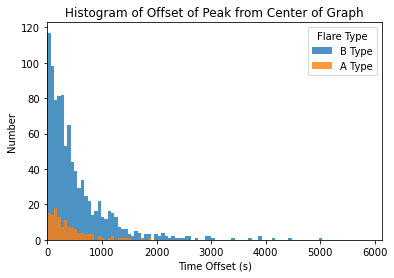

In [5]:
# Log Scale
plt.figure()
bins = np.logspace(0, 5, 70)
plt.hist(boffset, label="B Type", bins=bins, alpha=0.8)
plt.hist(aoffset, label="A Type", bins=bins, alpha=0.8)
plt.legend(title="Flare Type")
plt.xlabel("Time Offset (s)")
plt.ylabel("Number")
plt.xlim([1,10**4.5])
plt.xscale('log')
plt.title("Histogram of Offset of Peak from Center of Graph Log Scale")
plt.show()

# Histogram of offset of flare peak from center
plt.figure()
bins = np.arange(0, np.max(aoffset + boffset), np.max(aoffset + boffset) / 100)
plt.hist(boffset, label="B Type", bins=bins, alpha=0.8)
plt.hist(aoffset, label="A Type", bins=bins, alpha=0.8)
plt.legend(title="Flare Type")
plt.xlabel("Time Offset (s)")
plt.ylabel("Number")
plt.xlim(0, np.max(aoffset + boffset))
plt.title("Histogram of Offset of Peak from Center of Graph")
plt.show()